<a href="https://colab.research.google.com/github/Aamir195/rainfall/blob/main/RainfallPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/goverment data 1901-2017.csv')
print(df.shape)

(4188, 19)


In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
# insights about the data
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4188.000000,4184.000000,4185.000000,4182.000000,4184.000000,4185.000000,4183.000000,4181.000000,4184.000000,4182.000000,4181.000000,4177.000000,4178.000000,4162.000000,4182.000000,4179.000000,4178.000000,4175.000000
mean,1959.220630,18.938337,21.599427,27.412912,43.071845,85.660860,230.117475,347.020043,289.742185,197.316332,95.324707,39.496433,18.968645,1409.449207,40.522979,155.820914,1063.851580,153.648623
std,33.717097,33.793128,35.731734,46.927963,68.150985,122.695137,234.292087,268.850702,188.426071,135.547646,99.194851,68.358706,43.053759,902.599421,59.293904,201.198627,706.666045,166.863171
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.600000,70.800000,175.600000,155.850000,100.400000,14.600000,0.600000,0.100000,803.025000,4.000000,24.000000,573.850000,34.000000
50%,1959.000000,5.950000,6.500000,7.900000,15.450000,36.900000,138.800000,285.000000,258.500000,173.700000,65.200000,9.400000,3.000000,1120.350000,18.900000,74.800000,880.600000,97.700000
75%,1988.000000,22.000000,26.600000,31.375000,49.650000,97.800000,305.000000,418.500000,377.625000,266.125000,148.300000,45.300000,17.500000,1643.575000,50.175000,196.950000,1287.450000,211.800000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
# removing irrelevant variables
df.drop(['JF', 'MAM', 'JJAS', 'OND'], axis = 1, inplace = True)

In [ ]:
# checking for missing values
df.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
dtype: int64

In [ ]:
# Total Subdivisions
len(df['SUBDIVISION'].unique())

36

In [ ]:
# Subdivision names
df['SUBDIVISION'].unique()

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

In [ ]:
# creating a mapping of subdivision and a value corressponding to that subdivision for encoding
sub_div = {'SUBDIVISION':[],
           'Value': []}

i = 1
for x in df['SUBDIVISION'].unique():
  sub_div['SUBDIVISION'].append(x)
  sub_div['Value'].append(i)
  i += 1

sub_div = pd.DataFrame.from_dict(sub_div)

In [ ]:
sub_div

,SUBDIVISION,Value
0,Andaman & Nicobar Islands,1
1,Arunachal Pradesh,2
2,Assam & Meghalaya,3
3,Naga Mani Mizo Tripura,4
4,Sub Himalayan West Bengal & Sikkim,5
5,Gangetic West Bengal,6
6,Orissa,7
7,Jharkhand,8
8,Bihar,9
9,East Uttar Pradesh,10


In [ ]:
# mapping subdivisions with their corressponding values for imputing missing values
i = 1
for x in df['SUBDIVISION'].unique():
  df['SUBDIVISION'].replace(to_replace = x, value = i, inplace = True)
  i += 1

In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,1,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,1,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,1,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,1,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7


In [ ]:
# getting column names from dataset
cols = df.columns

In [ ]:
# imputing missing values using knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = imputer.fit_transform(df)
df = pd.DataFrame(df, columns = cols)

In [ ]:
# now we have zero missing values in every column
df.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
dtype: int64

In [ ]:
# remapping subdivision values to their corressponding names
i = 0
for x in df['SUBDIVISION'].unique():
  df['SUBDIVISION'].replace(to_replace = x, value = sub_div.iloc[i, 0], inplace = True)
  i += 1

In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,Andaman & Nicobar Islands,1901.0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,Andaman & Nicobar Islands,1902.0,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,Andaman & Nicobar Islands,1903.0,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,Andaman & Nicobar Islands,1904.0,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,Andaman & Nicobar Islands,1905.0,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7


In [ ]:
# changing data type of year column to int as it was changed to float while processing
df = df.astype({"YEAR":'int'})

In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7


**Initially working on Kerala SUBDIVISION**

In [ ]:
# creating dataset for kerala from above dataset
Kerala = {'Month': [],
          'Rainfall':[]
          }

In [ ]:
# taking only those instances where the subdivision is kerala
df_kerala = df[df.SUBDIVISION == 'Kerala'].copy()
df_kerala.reset_index(inplace=True)
df_kerala.drop(['index'], axis=1, inplace = True)
df_kerala.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,Kerala,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6
1,Kerala,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6
2,Kerala,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2
3,Kerala,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7
4,Kerala,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6


In [ ]:
# checking shape of obtained 
df_kerala.shape

(117, 15)

In [ ]:
# getting values for kerala dataset 

# iterating each year
for index in range(df_kerala.shape[0]):
  # since the original dataset is having months as columns and
  # here we are taking date as one variable hence the following code will combine year and month to get data in form of 'YYYY-MM-DD' format
  # iterating over month to get month 
  for i in range(12):
    Kerala['Month'].append(f'{df_kerala.iloc[index, 1]}-{i + 1}')    
    Kerala['Rainfall'].append(df_kerala.iloc[index, i+2])

In [ ]:
# converting dictionary to pandas DataFrame
Kerala = pd.DataFrame.from_dict(Kerala)

In [ ]:
Kerala

,Month,Rainfall
0,1901-1,28.7
1,1901-2,44.7
2,1901-3,51.6
3,1901-4,160.0
4,1901-5,174.7
...,...,...
1399,2017-8,462.6
1400,2017-9,435.5
1401,2017-10,228.0
1402,2017-11,152.1


In [ ]:
df_kerala.iloc[116] # confirming with above that values are fetched correctly

SUBDIVISION    Kerala
YEAR             2017
JAN              12.7
FEB               0.3
MAR              87.8
APR              52.8
MAY             213.3
JUN             579.8
JUL             378.5
AUG             462.6
SEP             435.5
OCT               228
NOV             152.1
DEC              61.4
ANNUAL         2664.9
Name: 116, dtype: object

In [ ]:
# converting Date column which is having dtype as string to Date Time format
Kerala['Month'] = pd.to_datetime(Kerala['Month'])
Kerala
# Now we have proper data that can be used for further analysis and modeling

,Month,Rainfall
0,1901-01-01,28.7
1,1901-02-01,44.7
2,1901-03-01,51.6
3,1901-04-01,160.0
4,1901-05-01,174.7
...,...,...
1399,2017-08-01,462.6
1400,2017-09-01,435.5
1401,2017-10-01,228.0
1402,2017-11-01,152.1


In [ ]:
Kerala.set_index('Month', inplace=True)
Kerala.head()

,Rainfall
Month,
1901-01-01,28.7
1901-02-01,44.7
1901-03-01,51.6
1901-04-01,160.0
1901-05-01,174.7


In [ ]:
Kerala.describe()

,Rainfall
count,1404.000000
mean,242.854701
std,256.429057
min,0.000000
25%,33.975000
50%,154.150000
75%,372.450000
max,1526.500000


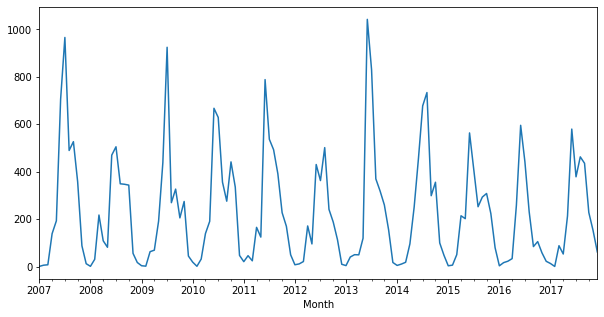

In [ ]:
# plotting rainfall for year 2007 to 2017
plt.figure(figsize = (10, 5))
Kerala.iloc[1272:, 0].plot()
# from the plot we can see that the data is seasonal as it should be!

In [ ]:
# Testing if the data is Stationary
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(Kerala['Rainfall'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# H0: It is not stationary
# H1: It is stationary

def adfuller_test(rainfall):
    result = adfuller(rainfall)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis(H0), hence reject the null hypothesis. \nData has no unit root and is Stationary')
    else: 
        print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is not stationary")

In [ ]:
adfuller_test(Kerala['Rainfall'])

ADF Test Statistic : -5.566642162971572
p-value : 1.4995324076184994e-06
#Lags Used : 24
Number of Observations Used : 1379
Strong evidence against the null hypothesis(H0), hence reject the null hypothesis. 
Data has no unit root and is Stationary


**Forecasting Model ARIMA**

Auto Regressive Model

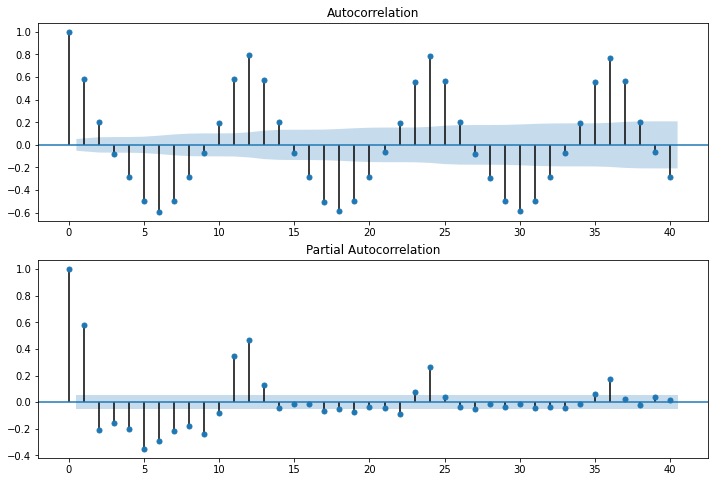

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Kerala['Rainfall'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Kerala['Rainfall'], lags=40, ax=ax2)

Therefore, from above plot we set our p = 3 and q = 2 and since no shift was made hence d = 0.

In [ ]:
# SARIMAX model since our data is Seasonal
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(Kerala['Rainfall'], order=(5,0,2), seasonal_order=(5,0,[],12))
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


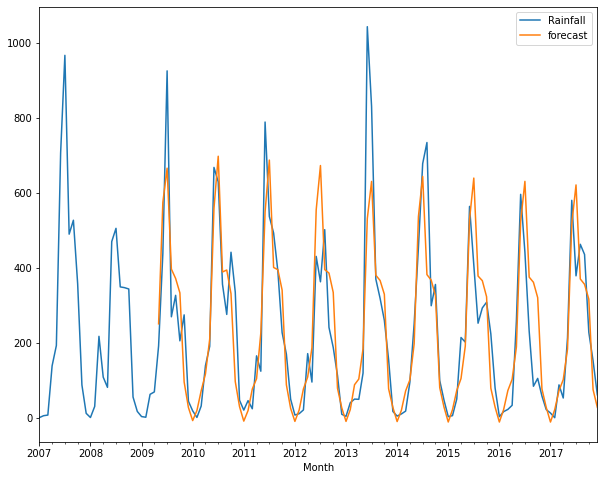

In [ ]:
Kerala['forecast'] = results.predict(start = 1300, end = 1403, dynamic = True)
Kerala[['Rainfall', 'forecast']].iloc[1272:].plot(figsize=(10,8))

We can see that our forecast is quite accurate

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(Kerala['Rainfall'].iloc[1300:1404], Kerala['forecast'].iloc[1300:1404])
print('Mean Absolute Error: ', mae)

r_squared = r2_score(Kerala['Rainfall'].iloc[1300:1404], Kerala['forecast'].iloc[1300:1404])
print('R Squared Error: ', r_squared)

Mean Absolute Error:  81.9429291560626
R Squared Error:  0.7329310542360321


In [ ]:
# saving the csv file for later use
Kerala.to_csv('/content/drive/MyDrive/Rainfall/Kerala.csv')

In [ ]:
import datetime
start_date = datetime.datetime(2017,12,1)
end_date = datetime.datetime(2019,12,1)

num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)

In [ ]:
# prediction for future dates
from pandas.tseries.offsets import DateOffset
future_dates = [Kerala.index[-1] + DateOffset(months=x) for x in range(0,num_months+1)]

In [ ]:
future_dates_df = pd.DataFrame(index = future_dates[1:], columns = Kerala.columns)
future_dates_df

,Rainfall,forecast
2018-01-01,NaN,NaN
2018-02-01,NaN,NaN
2018-03-01,NaN,NaN
2018-04-01,NaN,NaN
2018-05-01,NaN,NaN
2018-06-01,NaN,NaN
2018-07-01,NaN,NaN
2018-08-01,NaN,NaN
2018-09-01,NaN,NaN
2018-10-01,NaN,NaN


In [ ]:
future_df = pd.concat([Kerala, future_dates_df])

In [ ]:
future_df.shape[0] - 1

1427

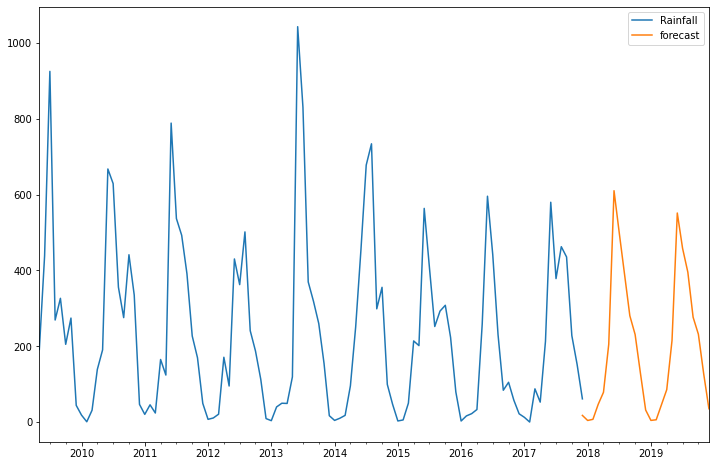

In [ ]:
future_df['forecast'] = results.predict(start = 1403, end = 1427, dynamic = True)
future_df[['Rainfall', 'forecast']].iloc[1300:].plot(figsize=(12,8))

In [ ]:
future_df.tail()

,Rainfall,forecast
2019-08-01,NaN,395.432559
2019-09-01,NaN,276.644770
2019-10-01,NaN,231.810606
2019-11-01,NaN,128.178571
2019-12-01,NaN,35.269481


In [ ]:
results.save('/content/drive/MyDrive/Rainfall/forecast_model.pkl')